In [1]:
import numpy as np
import pandas as pd
import re
from _helper import checking_missing, correlation_analysis
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print('Loading data...')
df = pd.read_csv("../../MLProject/data_train.csv")
print('Data is loaded')

Loading data...
Data is loaded


In [3]:
target_columns = ['ASOURCE','ATYPE','RACE','ZIPINC_QRTL','TOTCHG']
CM_columns = []
DXCCS_columns = []
PRCCS_columns = []
PRDAY_columns = []
HOSP_columns = []
other_columns = []
for col in df.columns:
    if re.match('^CM',col):
        CM_columns.append(col)
    elif re.match('^DXCCS',col):
        DXCCS_columns.append(col)
    elif re.match('^PRCCS',col):
        PRCCS_columns.append(col)
    elif re.match('^PRDAY',col):
        PRDAY_columns.append(col)
    elif re.match('^HOSP',col):
        HOSP_columns.append(col)
    elif col not in target_columns:
        other_columns.append(col)

# Missing data

## PRDAY_columns

In [4]:
sub_prday = df.loc[:,PRDAY_columns]

In [5]:
PRDAT_mean = sub_prday.mean(axis = 1).rename('PRDAT_mean').fillna(9999)
PRDAT_var = sub_prday.var(axis = 1).rename('PRDAT_var').fillna(0)

In [6]:
PRDAY1_ = df['PRDAY1'].fillna(9999).rename('PRDAY1_')
PRDAY2_ = df['PRDAY2'].fillna(9999).rename('PRDAY2_')
PRDAY3_ = df['PRDAY3'].fillna(9999).rename('PRDAY3_')

In [7]:
PREDAY_new = pd.concat([df['PRDAY1'], PRDAY1_, df['PRDAY2'],PRDAY2_, df['PRDAY3'],PRDAY3_, PRDAT_mean, PRDAT_var], axis=1)


In [8]:
target = df.loc[:,['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL']]

In [9]:
df_check = pd.concat([PREDAY_new,target],axis=1)

In [10]:
# df_check.head(10)

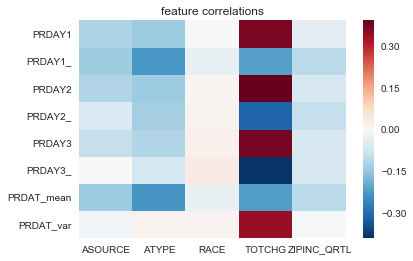

In [11]:
other_columns_correlation = correlation_analysis(df_check,list(target.columns), list(PREDAY_new.columns))

In [12]:
# using PRDAY1_ and PRDAY_mean
PREDAY= pd.concat([PRDAY1_,PRDAT_mean],axis = 1)

In [13]:
# missing_check = checking_missing(PREDAY,False)

## DXCCS_columns

In [15]:
sub_dxccs = df.loc[:,DXCCS_columns]

In [16]:
Mean = sub_dxccs.mean().mean()
print('The mean of dxccs is:',Mean)
dxccs = df.loc[:,DXCCS_columns[:5]].fillna(Mean)

The mean of dxccs is: 184.74491170263215


In [17]:
# missing_check = checking_missing(dxccs,False)

## PRCCS_columns

In [18]:
prccs = df.loc[:,PRCCS_columns[:3]].fillna(231)

In [19]:
# missing_check = checking_missing(prccs,False)

## HOSP_columns

In [20]:
sub_hosp = df.loc[:,HOSP_columns[1:4]]

In [21]:
sub_hosp.dtypes

HOSP_BEDSIZE     float64
HOSP_CONTROL     float64
HOSP_LOCTEACH    float64
dtype: object

In [22]:
HOSP = pd.get_dummies(sub_hosp.astype(str), dummy_na=True)

In [23]:
# HOSP.head(5)

## other_columns

In [24]:
sub_others = df.loc[:,other_columns]

In [25]:
sub_others.drop('KEY', axis = 1,inplace=True)
sub_others.AGE.fillna(df.AGE.mean(),inplace =True)
sub_others.AMONTH.fillna(df.AMONTH.mode()[0],inplace =True)
sub_others.AWEEKEND.fillna(0,inplace =True)
sub_others.DIED.fillna(0,inplace =True)
sub_others.DISPUNIFORM.fillna(df.DISPUNIFORM.mode()[0],inplace =True)
# df["column"].fillna(lambda x: random.choice(df[df[column] != np.nan]["column"]), inplace =True)
sub_others.FEMALE.fillna(lambda x: random.choice(sub_others[sub_others[FEMALE] != np.nan]["FEMALE"]), inplace = True)
sub_others.LOS.fillna(lambda x: random.choice(sub_others[sub_others[LOS] != np.nan]["LOS"]), inplace = True)
sub_others.PAY1.fillna(7,inplace =True)

In [26]:
# missing_check = checking_missing(sub_others,False)

# concatenate all columns

In [27]:
cm = df.loc[:,CM_columns]

In [43]:
X = pd.concat([PREDAY,dxccs,prccs,HOSP,sub_others,cm],axis = 1)

In [44]:
print('The shape of df is:', df.shape)
print('The shape of X is:', X.shape)

The shape of df is: (494932, 111)
The shape of X is: (494932, 72)


# data split

In [45]:
target_columns = ['ASOURCE','ATYPE','RACE','ZIPINC_QRTL','TOTCHG']
Y = df.loc[:,target_columns]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [47]:
# making directory
if not os.path.exists("../../MLProject/split_data/"):
    os.makedirs("../../MLProject/split_data/")

In [48]:
# saving data   
X_train.to_csv("../../MLProject/split_data/X_train.csv")
y_train.to_csv("../../MLProject/split_data/y_train.csv")
X_test.to_csv("../../MLProject/split_data/X_test.csv")
y_test.to_csv("../../MLProject/split_data/y_test.csv")